<a href="https://colab.research.google.com/github/Shraddha9045/ML_PROJECT/blob/main/MLProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
df = pd.read_csv('/content/ENB2012_data.csv')

In [ ]:
print(df.head())

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [ ]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(df.isnull().sum())

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


In [ ]:
X = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']]
y = df['Y1']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
print(pd.DataFrame(X_scaled, columns=X.columns).head())

         X1        X2        X3        X4   X5        X6   X7   X8
0  1.000000  0.000000  0.285714  0.000000  1.0  0.000000  0.0  0.0
1  1.000000  0.000000  0.285714  0.000000  1.0  0.333333  0.0  0.0
2  1.000000  0.000000  0.285714  0.000000  1.0  0.666667  0.0  0.0
3  1.000000  0.000000  0.285714  0.000000  1.0  1.000000  0.0  0.0
4  0.777778  0.166667  0.428571  0.111111  1.0  0.000000  0.0  0.0


In [ ]:
print(df.dtypes)

X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6      int64
X7    float64
X8      int64
Y1    float64
Y2    float64
dtype: object


In [ ]:
print(df.describe())

               X1          X2          X3          X4         X5          X6  \
count  768.000000  768.000000  768.000000  768.000000  768.00000  768.000000   
mean     0.764167  671.708333  318.500000  176.604167    5.25000    3.500000   
std      0.105777   88.086116   43.626481   45.165950    1.75114    1.118763   
min      0.620000  514.500000  245.000000  110.250000    3.50000    2.000000   
25%      0.682500  606.375000  294.000000  140.875000    3.50000    2.750000   
50%      0.750000  673.750000  318.500000  183.750000    5.25000    3.500000   
75%      0.830000  741.125000  343.000000  220.500000    7.00000    4.250000   
max      0.980000  808.500000  416.500000  220.500000    7.00000    5.000000   

               X7         X8          Y1          Y2  
count  768.000000  768.00000  768.000000  768.000000  
mean     0.234375    2.81250   22.307201   24.587760  
std      0.133221    1.55096   10.090196    9.513306  
min      0.000000    0.00000    6.010000   10.900000  
25% 

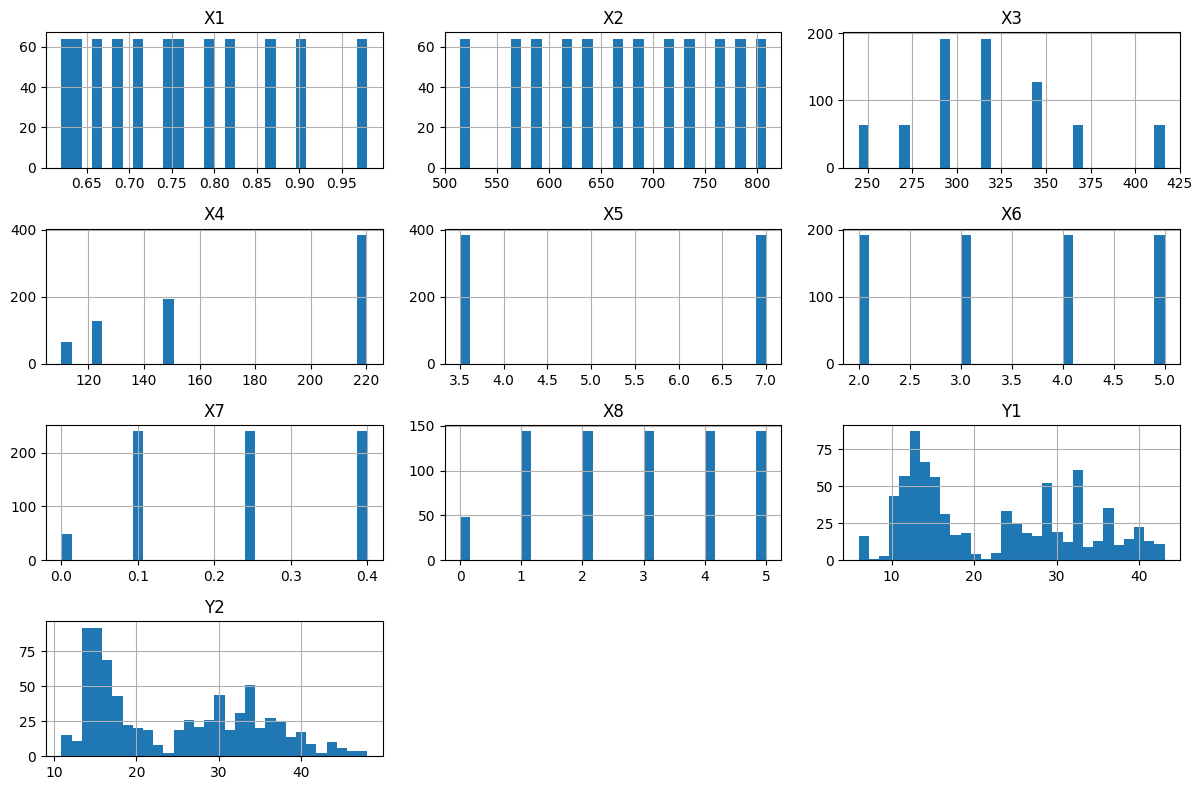

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

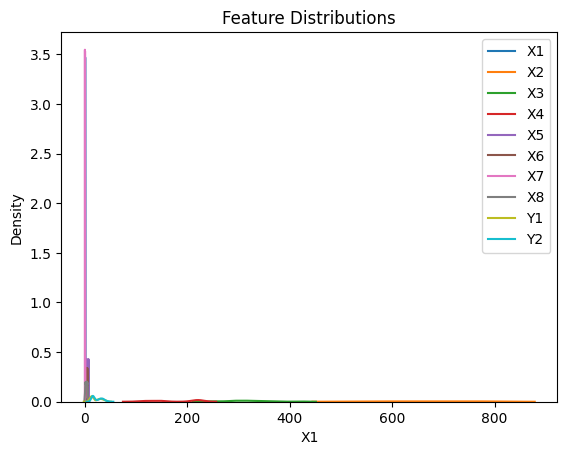

In [ ]:
for col in df.columns:
    sns.kdeplot(df[col], label=col)
plt.legend()
plt.title("Feature Distributions")
plt.show()

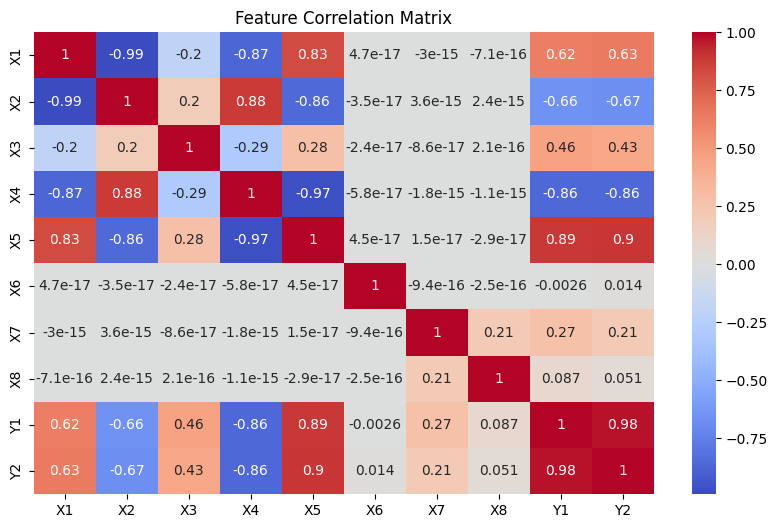

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
print(df.nunique())

X1     12
X2     12
X3      7
X4      4
X5      2
X6      4
X7      4
X8      6
Y1    586
Y2    636
dtype: int64


In [ ]:
corr_with_y = df[['X5', 'Y1']].corr()  # or Y2
print(corr_with_y)

          X5        Y1
X5  1.000000  0.889431
Y1  0.889431  1.000000


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Y1', 'Y2'])
y = df['Y1']  # or y = df['Y2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

model = KNeighborsRegressor(n_neighbors=5)  # start with k=5

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 4.854375324675326


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
model = KNeighborsRegressor()

In [ ]:
model.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse}")
print(f"R2 Score: {r2}")

MSE (Mean Squared Error): 4.854375324675326
R2 Score: 0.9534270061601766


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = KNeighborsRegressor()

param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11, 13]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

print("Best k value found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Mean Squared Error): {mse}")
print(f"R2 Score: {r2}")

Best k value found:  {'n_neighbors': 3}
MSE (Mean Squared Error): 5.405842063492065
R2 Score: 0.9481362209793877


In [ ]:
import joblib
joblib.dump(best_model, 'optimized_knn_model.pkl')


['optimized_knn_model.pkl']

In [ ]:
best_model = joblib.load('optimized_knn_model.pkl')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import joblib

best_model = KNeighborsRegressor(n_neighbors=3)
best_model.fit(X_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [ ]:
feature_columns = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
new_data = [[30, 65, 4, 1020, 5, 15, 2, 3]]

new_data_df = pd.DataFrame(new_data, columns=feature_columns)
predictions = best_model.predict(new_data_df)
print("Predicted Energy Consumption:", predictions)


Predicted Energy Consumption: [12.86666667]
